In [4]:
!pip install -q tfds-nightly tensorflow matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 16.8 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import tensorflow_datasets as tfds
from sklearn.preprocessing import LabelEncoder

!pip install tensorflow-datasets


In [6]:
datos,metadatos = tfds.load('tf_flowers', as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [7]:
metadatos

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/root/tensorflow_datasets/tf_flowers/3.0.1.incompleteM7XC0C',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

,image,label
0,,2 (tulips)
1,,3 (sunflowers)
2,,3 (sunflowers)
3,,4 (roses)
4,,3 (sunflowers)
5,,0 (dandelion)
6,,0 (dandelion)
7,,0 (dandelion)
8,,0 (dandelion)
9,,1 (daisy)

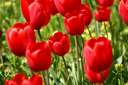
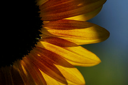
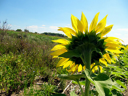
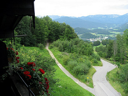
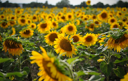
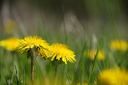
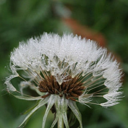
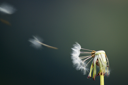
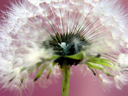
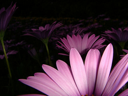

In [8]:
tfds.as_dataframe(datos['train'].take(10), metadatos)

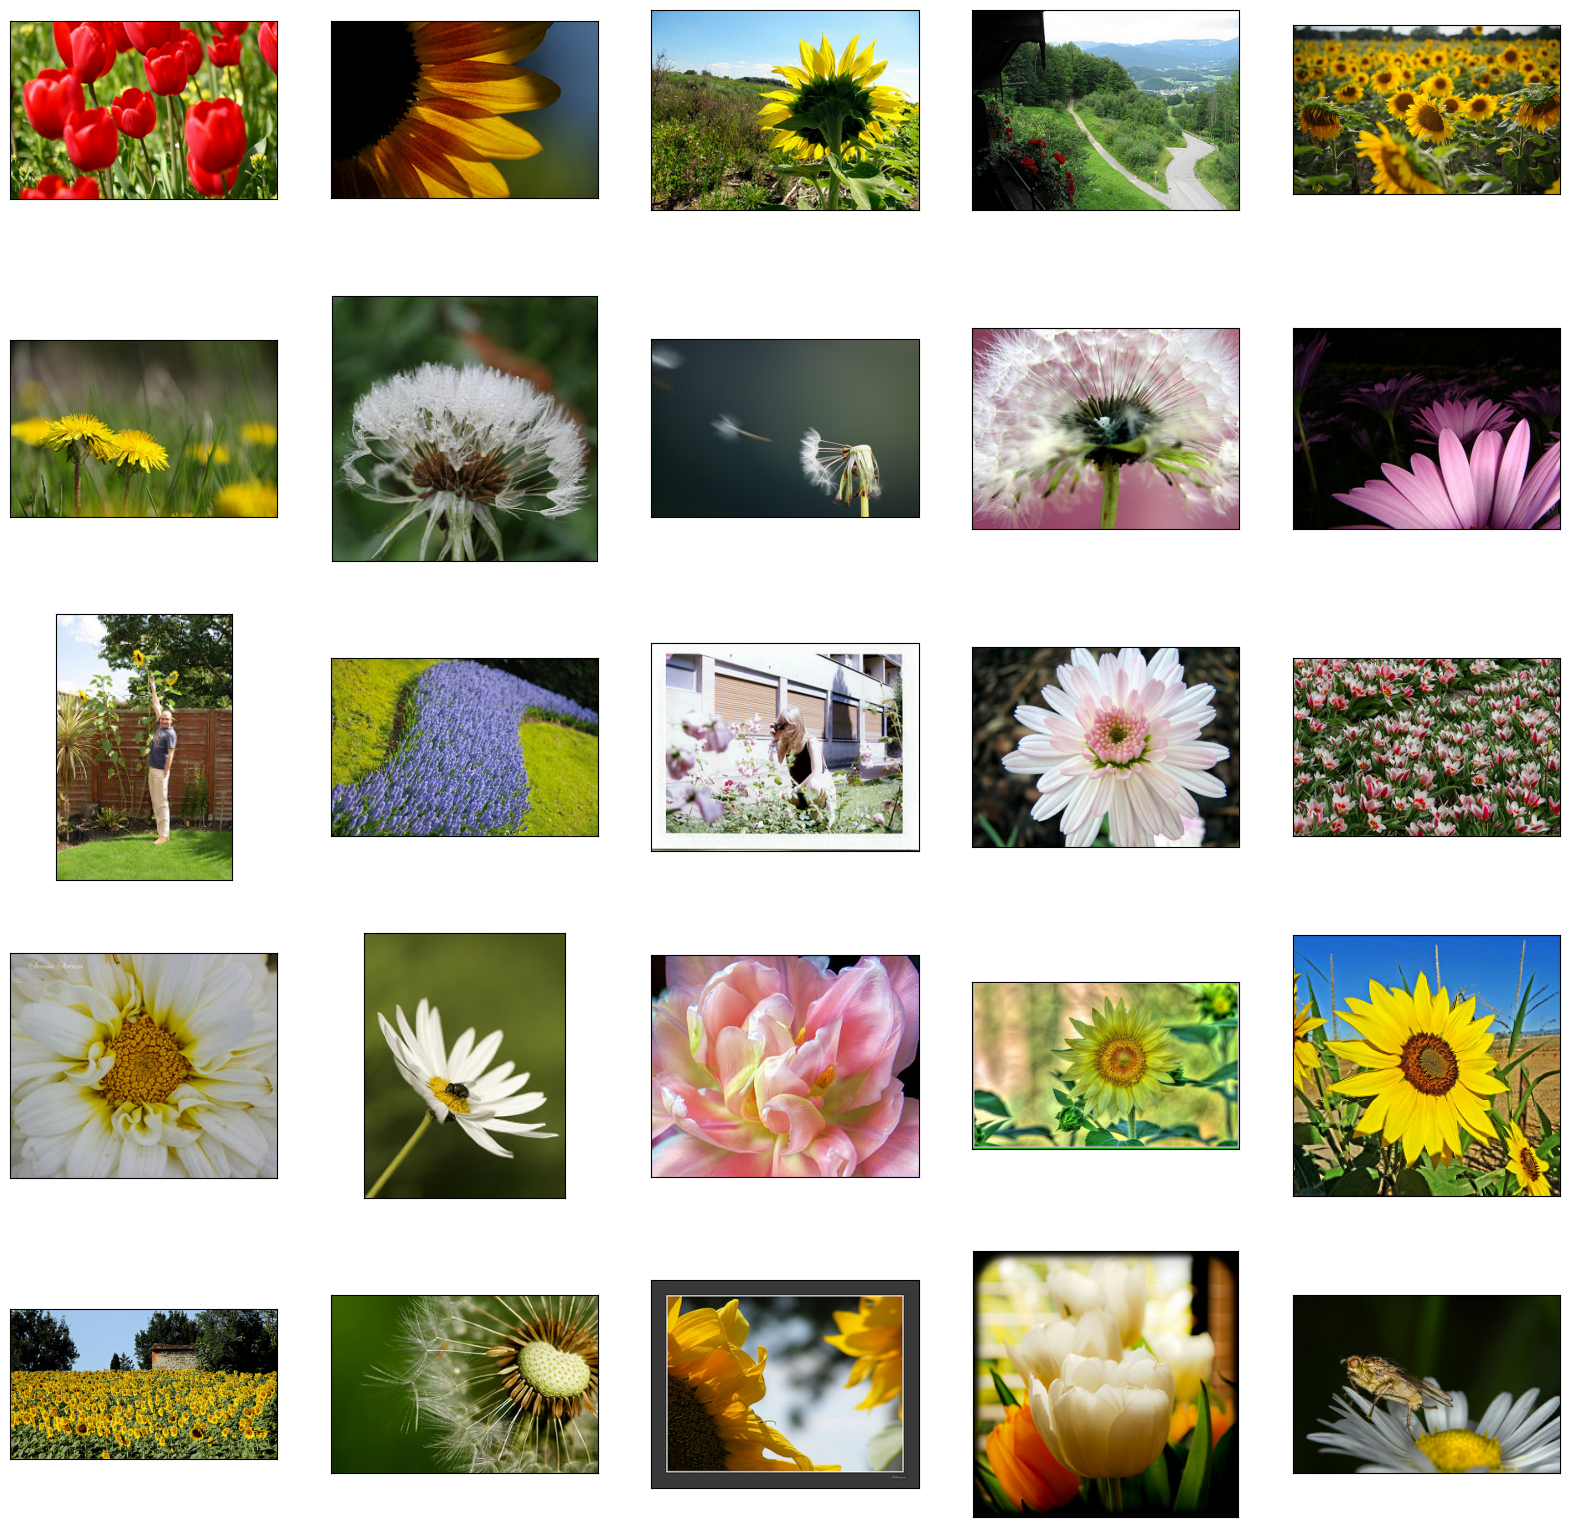

In [9]:
plt.figure(figsize=(20, 20))
TAMANO = 100

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen, cmap='gray')


In [10]:
datos_entrenamiento = []
x = [] #imagenes de entrada(pixeles)
y = [] #etiquetas


In [11]:
for i, (imagen, etiqueta) in enumerate(datos['train']):
    imagen = cv2.resize(imagen.numpy(), (TAMANO, TAMANO))
    datos_entrenamiento.append([imagen, etiqueta])
    x.append(imagen)
    y.append(etiqueta)

In [12]:
datos_entrenamiento[3]

[array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [247, 247, 246],
         [246, 246, 246],
         [247, 247, 247]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [251, 251, 250],
         [250, 250, 250],
         [247, 247, 247]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [250, 250, 249],
         [249, 249, 248],
         [248, 248, 248]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [113, 137,  72],
         [ 76, 108,  50],
         [ 88, 110,  70]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [110, 142,  67],
         [ 93, 130,  63],
         [106, 120,  76]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 96, 130,  56],
  

In [13]:
len(datos_entrenamiento)

3670

In [14]:
import numpy as np


x = np.array(x).astype(float)/255

In [15]:
y = np.array(y)

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(TAMANO, TAMANO, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])



In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(x,y,batch_size = 32,
          validation_split = 0.15,
          epochs = 15) #entrenar 30 epochs aprox

Epoch 1/15
98/98 [==============================] - 48s 479ms/step - loss: 1.2935 - accuracy: 0.4354 - val_loss: 1.0726 - val_accuracy: 0.5445
Epoch 2/15
98/98 [==============================] - 46s 475ms/step - loss: 1.0304 - accuracy: 0.5858 - val_loss: 0.8922 - val_accuracy: 0.6443
Epoch 3/15
98/98 [==============================] - 47s 476ms/step - loss: 0.8747 - accuracy: 0.6576 - val_loss: 0.8029 - val_accuracy: 0.6915
Epoch 4/15
98/98 [==============================] - 47s 478ms/step - loss: 0.7756 - accuracy: 0.7018 - val_loss: 0.7885 - val_accuracy: 0.6915
Epoch 5/15
98/98 [==============================] - 47s 484ms/step - loss: 0.7004 - accuracy: 0.7239 - val_loss: 0.7234 - val_accuracy: 0.7296
Epoch 6/15
98/98 [==============================] - 46s 471ms/step - loss: 0.5950 - accuracy: 0.7775 - val_loss: 0.6713 - val_accuracy: 0.7477
Epoch 7/15
98/98 [==============================] - 46s 469ms/step - loss: 0.5372 - accuracy: 0.7916 - val_loss: 0.7223 - val_accuracy: 0.7350

In [37]:
razas_disponibles = metadatos.features['label'].names
razas_disponibles

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [38]:
import tensorflow as tf
from google.colab import files
model.save('quinceperros.h5')
#files.download('quinceperros.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


Saving ds.jpeg to ds (2).jpeg


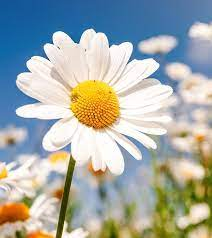

1/1 [==============================] - 0s 24ms/step
1: Clase predicha: daisy - Probabilidad: 1.0000
2: Clase predicha: roses - Probabilidad: 0.0000
3: Clase predicha: sunflowers - Probabilidad: 0.0000


In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
from IPython.display import display, Image

# Asumiendo que ya tienes 'model' definido en tu código con el modelo Sequential
# También asumiremos que tienes una lista llamada 'classes' que contiene los nombres de las clases en el mismo orden que el modelo espera.

# Convertir la lista a un array de numpy
classes_array = razas_disponibles
print(classes_array)

def cargar_y_preprocesar_imagen(ruta_imagen):
    # Cargar la imagen desde el archivo
    img = image.load_img(ruta_imagen, target_size=(100, 100))
    # Convertir la imagen a un array numpy
    img_array = image.img_to_array(img)
    # Añadir una dimensión extra para cumplir con las expectativas de la red neuronal
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocesar la imagen para que coincida con el formato que utiliza la red neuronal
    img_array = preprocess_input(img_array)
    return img_array

def hacer_prediccion(ruta_imagen):
    nuevo_array = metadatos.features['label'].names
    # Cargar y preprocesar la imagen
    img_array = cargar_y_preprocesar_imagen(ruta_imagen)
    # Obtener las predicciones usando el modelo cargado
    predictions = model.predict(img_array)
    # Obtener los índices de las tres predicciones principales
    top3_indices = np.argsort(predictions[0])[::-1][:3]
    # Obtener las clases y probabilidades correspondientes
    top3_classes = [classes_array[i] for i in top3_indices]
    top3_probs = predictions[0][top3_indices]

    # Mostrar las tres predicciones principales
    for i, (clase, prob) in enumerate(zip(top3_classes, top3_probs), 1):
        print(f"{i}: Clase predicha: {clase} - Probabilidad: {prob:.4f}")


# Subir una imagen en Google Colab
from google.colab import files
uploaded = files.upload()

# Seleccionar la imagen cargada
imagen_colab = list(uploaded.keys())[0]

# Mostrar la imagen
display(Image(imagen_colab))

# Hacer la predicción
hacer_prediccion(imagen_colab)








In [22]:
model.save('modelo_flores.h5')

In [23]:
!pip install tensorflowjs

In [24]:
!mkdir carpeta_modelo

In [25]:
!tensorflowjs_converter --input_format keras modelo_flores.h5 carpeta_modelo

2024-01-24 13:08:04.624504: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 13:08:04.624570: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 13:08:04.626566: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-24 13:08:05.995441: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [29]:
!ls carpeta_modelo

group1-shard1of1.bin  model.json


In [31]:
!zip -r carpeta_modelo.zip carpeta_modelo


  adding: carpeta_modelo/ (stored 0%)
  adding: carpeta_modelo/model.json (deflated 82%)
  adding: carpeta_modelo/group1-shard1of1.bin (deflated 7%)


In [ ]:
files.download('carpeta_modelo.zip')